### Percentile Maps

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [2]:
#Load .nc file for E3SM.HR and E3SM.MMF
#HR
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
esm_hr = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#MMF
path = '/Users/emmabenedict/Desktop/CURO 4970R/'
esm_mmf = xr.open_dataset(path + 'E3SM.MMF.ne30pg2_CRM64x2000.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')

In [3]:
#Load variables
#HR
lat_hr = esm_hr.lat
lon_hr = esm_hr.lon
time_hr = esm_hr.time
precc_hr = esm_hr.PRECC
precl_hr = esm_hr.PRECL
precip_hr = precc_hr + precl_hr
area_hr = esm_hr.area
#MMF
lat_mmf = esm_mmf.lat
lon_mmf = esm_mmf.lon
time_mmf = esm_mmf.time
precc_mmf = esm_mmf.PRECC
precl_mmf = esm_mmf.PRECL
precip_mmf = precc_mmf + precl_mmf
area_mmf = esm_mmf.area

In [10]:
avg_precip_hr = np.mean(precip_hr, axis = 0)*1000*60*60*24
avg_precip_mmf = np.mean(precip_mmf, axis = 0)*1000*60*60*24

In [11]:
#Calculate Percentiles
#99th
hr_99 = np.percentile(precip_hr, 99, axis = 0)
mmf_99 = np.percentile(precip_mmf, 99, axis = 0)
#75th
hr_75 = np.percentile(precip_hr, 75, axis = 0)
mmf_75 = np.percentile(precip_mmf, 75, axis = 0)
#50 
hr_50 = np.percentile(precip_hr, 50, axis = 0)
mmf_50 = np.percentile(precip_mmf, 50, axis = 0)
#25
hr_25 = np.percentile(precip_hr, 25, axis = 0)
mmf_25 = np.percentile(precip_mmf, 25, axis = 0)

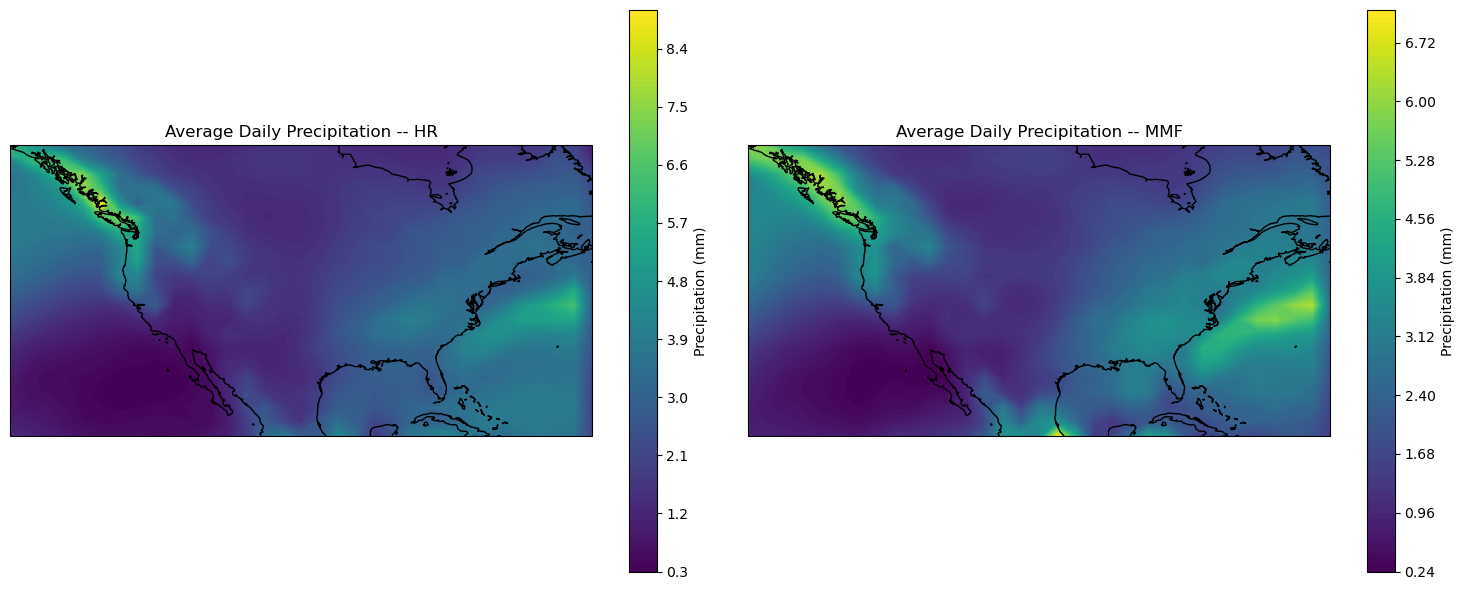

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the average precipitation
c1 = axs[0].contourf(lon_hr, lat_hr, avg_precip_hr, cmap='viridis', levels=100)
axs[0].coastlines()
axs[0].set_title('Average Daily Precipitation -- HR')
plt.colorbar(c1, ax=axs[0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c2 = axs[1].contourf(lon_mmf, lat_mmf, avg_precip_mmf, cmap='viridis', levels=100)
axs[1].coastlines()
axs[1].set_title('Average Daily Precipitation -- MMF')
plt.colorbar(c2, ax=axs[1], label='Precipitation (mm)')

# Adjust layout
plt.tight_layout()
plt.show()

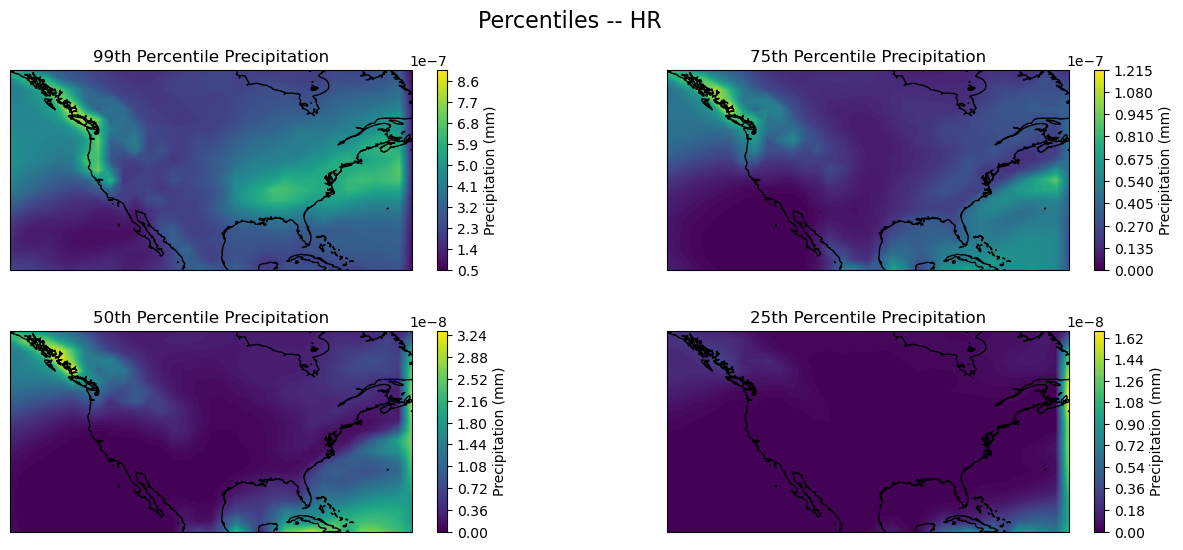

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the average precipitation
c1 = axs[0,0].contourf(lon_hr, lat_hr, hr_99, cmap='viridis', levels=100)
axs[0,0].coastlines()
axs[0,0].set_title('99th Percentile Precipitation')
plt.colorbar(c1, ax=axs[0,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c2 = axs[0,1].contourf(lon_hr, lat_hr, hr_75, cmap='viridis', levels=100)
axs[0,1].coastlines()
axs[0,1].set_title('75th Percentile Precipitation')
plt.colorbar(c2, ax=axs[0,1], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c3 = axs[1,0].contourf(lon_hr, lat_hr, hr_50, cmap='viridis', levels=100)
axs[1,0].coastlines()
axs[1,0].set_title('50th Percentile Precipitation')
plt.colorbar(c3, ax=axs[1,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c4 = axs[1,1].contourf(lon_hr, lat_hr, hr_25, cmap='viridis', levels=100)
axs[1,1].coastlines()
axs[1,1].set_title('25th Percentile Precipitation')
plt.colorbar(c4, ax=axs[1,1], label='Precipitation (mm)')

fig.suptitle('Percentiles -- HR', fontsize=16)

# Adjust layout
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

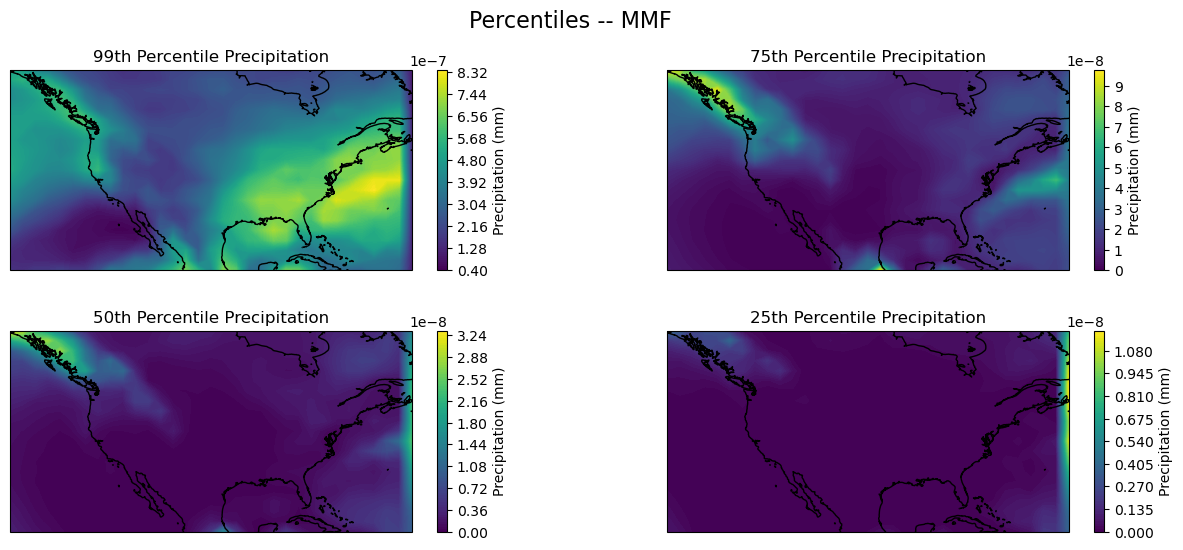

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the average precipitation
c1 = axs[0,0].contourf(lon_mmf, lat_mmf, mmf_99, cmap='viridis', levels=100)
axs[0,0].coastlines()
axs[0,0].set_title('99th Percentile Precipitation')
plt.colorbar(c1, ax=axs[0,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c2 = axs[0,1].contourf(lon_mmf, lat_mmf, mmf_75, cmap='viridis', levels=100)
axs[0,1].coastlines()
axs[0,1].set_title('75th Percentile Precipitation')
plt.colorbar(c2, ax=axs[0,1], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c3 = axs[1,0].contourf(lon_mmf, lat_mmf, mmf_50, cmap='viridis', levels=100)
axs[1,0].coastlines()
axs[1,0].set_title('50th Percentile Precipitation')
plt.colorbar(c3, ax=axs[1,0], label='Precipitation (mm)')

# Plot the 99th percentile precipitation
c4 = axs[1,1].contourf(lon_mmf, lat_mmf, mmf_25, cmap='viridis', levels=100)
axs[1,1].coastlines()
axs[1,1].set_title('25th Percentile Precipitation')
plt.colorbar(c4, ax=axs[1,1], label='Precipitation (mm)')

fig.suptitle('Percentiles -- MMF', fontsize=16)

# Adjust layout
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()